In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from IPython.display import clear_output
import re
clear_output()

In [52]:
#from google.colab import drive
#drive.mount('drive')

In [53]:
#!pip install requests
import requests

In [54]:
url4='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Nabeul%2C%2021%2C%20TN/today?unitGroup=us&key=TTXUCEGRJQMG5F3AAEFBZF8GX&include=current'
res4=requests.get(url4).json()
df4=pd.DataFrame(res4['currentConditions'])
df4.columns

Index(['datetime', 'datetimeEpoch', 'temp', 'feelslike', 'humidity', 'dew',
       'precip', 'precipprob', 'snow', 'snowdepth', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'icon',
       'stations', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase'],
      dtype='object')

In [55]:
df5=pd.DataFrame()
df5['Date time']=df4['datetime']
df5['Temperature']=df4['temp']
df5['Precipitation']=df4['precip']
df5['Snow']=df4['snow']
df5['Snow Depth']=df4['snowdepth']
df5['Wind Speed']=df4['windspeed']
df5['Wind Direction']=df4['winddir']
df5['Wind Gust']=df4['windgust']
df5['Visibility']=df4['visibility']
df5['Cloud Cover']=df4['cloudcover']
df5['Relative Humidity']=df4['humidity']
df5['Conditions']=df4['conditions']
df5.drop_duplicates(inplace=True)
df5


,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,00:01:14,62.4,0.0,None,0.0,3.5,320.0,0.0,6.2,25.0,73.2,Partially cloudy


In [56]:
dfWeather = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Weather.csv')
dfWeather

,Unnamed: 0,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,0,"نابل, تونس",01/02/2017,60.1,41.5,48.9,39.9,NaN,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain
1,1,"نابل, تونس",01/03/2017,62.1,41.5,50.8,38.1,NaN,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain
2,2,"نابل, تونس",01/04/2017,61.5,50.2,54.8,NaN,NaN,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy
3,3,"نابل, تونس",01/05/2017,61.1,50.4,55.2,NaN,NaN,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy"
4,4,"نابل, تونس",01/06/2017,51.9,44.5,48.4,38.9,NaN,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,87,"نابل, تونس",12/28/2017,55.7,48.3,51.9,45.7,NaN,0.25,0,0,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy"
453,88,"نابل, تونس",12/29/2017,59.8,49.8,54.4,45.3,NaN,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy"
454,89,"نابل, تونس",12/30/2017,67.0,48.5,58.3,46.0,NaN,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain
455,90,"نابل, تونس",12/31/2017,71.3,50.4,60.0,NaN,NaN,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear


In [57]:
dfWeather.drop(['Unnamed: 0','Name','Maximum Temperature','Minimum Temperature','Wind Chill','Heat Index'],axis=1,inplace=True)
dfWeather

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,01/02/2017,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain
1,01/03/2017,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain
2,01/04/2017,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy
3,01/05/2017,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy"
4,01/06/2017,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...
452,12/28/2017,51.9,0.25,0,0,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy"
453,12/29/2017,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy"
454,12/30/2017,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain
455,12/31/2017,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear


In [58]:
dfWeather['Date time'] = pd.to_datetime(dfWeather['Date time'], format='%m/%d/%Y')

In [59]:
dfSinistresComplement = pd.read_csv('C:/Users/Meriem/Downloads/CGA/SinistreC.csv',sep=';')
dfSinistresComplement.head(3)

C:\Users\Meriem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sinistre_id,cga_police_id,cga_vehicule_id,cga_assure_id,date,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre
0,2,174557,166073,144565,NaN,S170155501,2017-12-18,0,2017-12-18,NaN,NaN,0,834736,11.0,0,1651TU133,TU,2,M,1
1,3,174557,166073,144565,NaN,S180017071,2018-02-16,0,2018-02-16,NaN,NaN,0,NaN,1.0,0,7046TU163,TU,2,M,1
2,4,174560,17936,119709,NaN,S170032921,2017-03-11,0,2017-03-27,NaN,NaN,100,010204000027,4.0,0,3626TU159,TU,3,M,1


In [60]:
dfSinistresComplement['dateOuvertureDuSinistre'] = pd.to_datetime(dfSinistresComplement['dateOuvertureDuSinistre'], format='%Y-%m-%d')

In [61]:
dfSinistreRecord = dfSinistresComplement.groupby(dfSinistresComplement.dateOuvertureDuSinistre.tolist()).size().reset_index().rename(columns={0:'records'})

In [62]:
dfSinistreRecord

,index,records
0,1995-06-02,1
1,1999-08-23,1
2,2003-10-23,1
3,2004-11-03,1
4,2006-02-17,1
...,...,...
1923,2019-09-25,596
1924,2019-09-26,681
1925,2019-09-27,686
1926,2019-09-28,98


In [63]:
dfSinistresEtWeather = pd.merge(dfWeather,dfSinistreRecord ,how="inner", left_on="Date time",right_on="index")
dfSinistresEtWeather

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,index,records
0,2017-01-02,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain,2017-01-02,173
1,2017-01-03,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain,2017-01-03,205
2,2017-01-04,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy,2017-01-04,193
3,2017-01-05,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy",2017-01-05,162
4,2017-01-06,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy",2017-01-06,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy",2017-12-29,905
425,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,2017-12-30,153
426,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,2017-12-30,153
427,2017-12-31,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear,2017-12-31,223


In [64]:
dfSinistresEtWeather

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,index,records
0,2017-01-02,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain,2017-01-02,173
1,2017-01-03,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain,2017-01-03,205
2,2017-01-04,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy,2017-01-04,193
3,2017-01-05,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy",2017-01-05,162
4,2017-01-06,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy",2017-01-06,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy",2017-12-29,905
425,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,2017-12-30,153
426,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,2017-12-30,153
427,2017-12-31,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear,2017-12-31,223


# Data Preparation for modeling 

In [65]:
PrSinistresEtWeather=dfSinistresEtWeather.drop(['index'],axis=1)

In [66]:
PrSinistresEtWeather.columns

Index(['Date time', 'Temperature', 'Precipitation', 'Snow', 'Snow Depth',
       'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions', 'records'],
      dtype='object')

In [67]:
PrSinistresEtWeather.dtypes

Date time            datetime64[ns]
Temperature                 float64
Precipitation               float64
Snow                          int64
Snow Depth                    int64
Wind Speed                  float64
Wind Direction              float64
Wind Gust                   float64
Visibility                  float64
Cloud Cover                 float64
Relative Humidity           float64
Conditions                   object
records                       int64
dtype: object

In [68]:
PrSinistresEtWeather.isna().sum()

Date time            0
Temperature          0
Precipitation        0
Snow                 0
Snow Depth           0
Wind Speed           0
Wind Direction       0
Wind Gust            5
Visibility           0
Cloud Cover          0
Relative Humidity    0
Conditions           0
records              0
dtype: int64

In [69]:
PrSinistresEtWeather.dropna(inplace=True)
PrSinistresEtWeather.isna().sum()

Date time            0
Temperature          0
Precipitation        0
Snow                 0
Snow Depth           0
Wind Speed           0
Wind Direction       0
Wind Gust            0
Visibility           0
Cloud Cover          0
Relative Humidity    0
Conditions           0
records              0
dtype: int64

In [70]:
PrSinistresEtWeather

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,records
0,2017-01-02,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain,173
1,2017-01-03,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain,205
2,2017-01-04,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy,193
3,2017-01-05,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy",162
4,2017-01-06,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy",198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy",905
425,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,153
426,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,153
427,2017-12-31,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear,223


In [71]:
data_dummies = pd.get_dummies(PrSinistresEtWeather, columns=['Conditions'], drop_first=True)
data_dummies

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,records,Conditions_Partially cloudy,Conditions_Rain,"Conditions_Rain, Partially cloudy"
0,2017-01-02,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,173,0,1,0
1,2017-01-03,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,205,0,1,0
2,2017-01-04,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,193,1,0,0
3,2017-01-05,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,162,0,0,1
4,2017-01-06,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,198,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,905,0,0,1
425,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,153,0,1,0
426,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,153,0,1,0
427,2017-12-31,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,223,0,0,0


<AxesSubplot:>

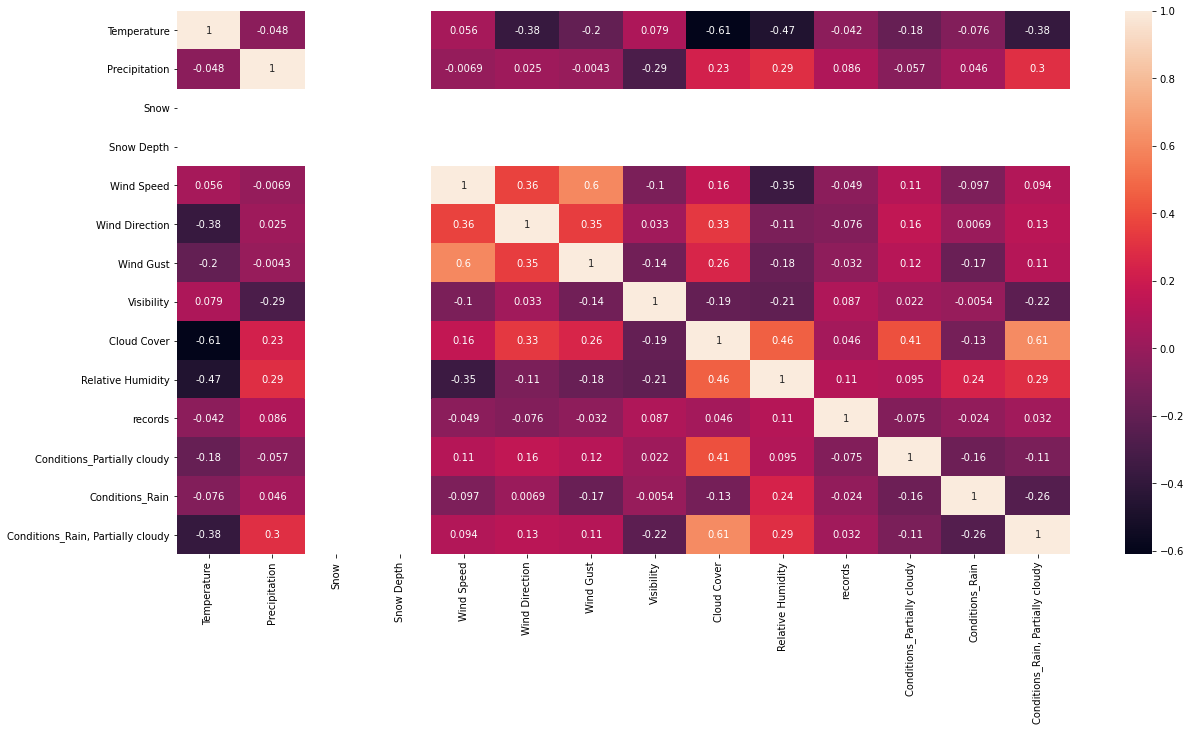

In [72]:
import seaborn as sns 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data_dummies.corr(),annot = True)

In [73]:
target_dummies = data_dummies['records']
target_dummies

0      173
1      205
2      193
3      162
4      198
      ... 
424    905
425    153
426    153
427    223
428    223
Name: records, Length: 424, dtype: int64

In [74]:
data_dummies=data_dummies.drop(['records'],axis=1)


In [75]:
data_dummies

,Date time,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions_Partially cloudy,Conditions_Rain,"Conditions_Rain, Partially cloudy"
0,2017-01-02,48.9,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,0,1,0
1,2017-01-03,50.8,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,0,1,0
2,2017-01-04,54.8,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,1,0,0
3,2017-01-05,55.2,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,0,0,1
4,2017-01-06,48.4,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,54.4,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,0,0,1
425,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,0,1,0
426,2017-12-30,58.3,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,0,1,0
427,2017-12-31,60.0,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,0,0,0


In [76]:
data_dummies.drop(['Date time'],axis=1,inplace=True)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_dummies, target_dummies, test_size=0.2, random_state=333)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [79]:
print("The train_score= ", model.score(X_train, Y_train))  #Calculate the train score and the test score of the model
print("The test_score= ", model.score(X_test, Y_test))

The train_score=  0.06618879524039745
The test_score=  -0.06468833424574072


In [80]:
print(y_pred)

[659.37162516 671.69579782 581.71177626 652.44316229 688.33587325
 578.23219498 585.09843358 510.98695346 631.75571787 690.9657996
 749.54491875 612.30786656 718.41610074 692.50472409 618.77396412
 624.47492539 695.07492976 629.55352376 604.32756202 641.16074743
 697.16196752 878.04739065 702.16763481 520.47202061 579.6226686
 551.34690535 580.20430547 702.30570482 477.12860845 706.80500975
 613.65101487 579.6843512  576.47415659 653.849081   594.79441012
 616.29374722 545.82965254 622.15879001 579.6226686  622.15879001
 557.71303997 550.34693317 630.93776044 636.11985086 598.18208038
 505.78796165 620.83405428 516.29152883 541.70828978 610.25332901
 540.70455522 584.79629982 480.87432406 595.48830105 692.44460204
 652.64301115 512.97611736 557.64769991 612.69690326 902.25313889
 614.68000264 685.85304078 619.85990576 633.78412565 559.08183172
 621.31712901 624.00177557 819.17320266 515.06391202 514.66960613
 416.39188891 571.39992292 746.30425336 711.05542244 555.15869021
 602.6355920

In [81]:
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree=4)
#model.fit(X_train, Y_train)

In [82]:
print("The train_score= ", model.score(X_train, Y_train))  #Calculate the train score and the test score of the model
print("The test_score= ", model.score(X_test, Y_test))

AttributeError: 'PolynomialFeatures' object has no attribute 'score'

In [ ]:
plt.plot(X_train, model.predict(X_train), color='red')
plt.plot(X_train,Y_train, color='blue')
pls.show()

In [ ]:
X_train_2 = model.fit_transform(X_train)
X_test_2 = model.fit_transform(X_test)

lin = LinearRegression()
lin.fit(X_train_2, Y_train)

print(lin.score(X_train_2, Y_train))
print(lin.score(X_test_2, Y_test))
print(lin.predict(X_test_2))